In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_bikes = pd.read_csv("data/sf_2018.csv")


In [3]:
df_bikes

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-01-31 22:52:36,2018-02-01 19:47:20,120.0,285.0,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber
1,2018-01-31 16:13:35,2018-02-01 15:57:18,15.0,15.0,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer
2,2018-01-31 14:23:56,2018-02-01 10:16:53,304.0,296.0,Jackson St at 5th St,5th St at Virginia St,3039,Customer
3,2018-01-31 14:53:24,2018-02-01 07:51:21,75.0,47.0,Market St at Franklin St,4th St at Harrison St,321,Customer
4,2018-01-31 19:52:25,2018-02-01 06:58:32,74.0,19.0,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber
...,...,...,...,...,...,...,...,...
1863716,2018-12-01 00:11:55,2018-12-01 00:19:49,345.0,81.0,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber
1863717,2018-12-01 00:02:49,2018-12-01 00:16:50,10.0,58.0,Washington St at Kearny St,Market St at 10th St,2034,Subscriber
1863718,2018-12-01 00:05:28,2018-12-01 00:09:48,245.0,255.0,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber
1863719,2018-12-01 00:03:07,2018-12-01 00:08:00,93.0,126.0,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber


In [4]:
df = df_bikes.copy(deep=True)

# Set start_time column as index in datetime format
df.index = pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S')

# Group By Month and user_type
grouped_month = df.groupby(by=[df.index.month, df.user_type])

# Group By Day (Hour) and user_type
grouped_day = df.groupby(by=[df.index.hour, df.user_type])

# Group By Week-Day
df = df_bikes.copy(deep=True)
df['start_time'] = pd.to_datetime(df['start_time'])
df["start_time"] = df["start_time"].dt.day_name()
grouped_weekday = df.groupby(by=[df.start_time, df.user_type])


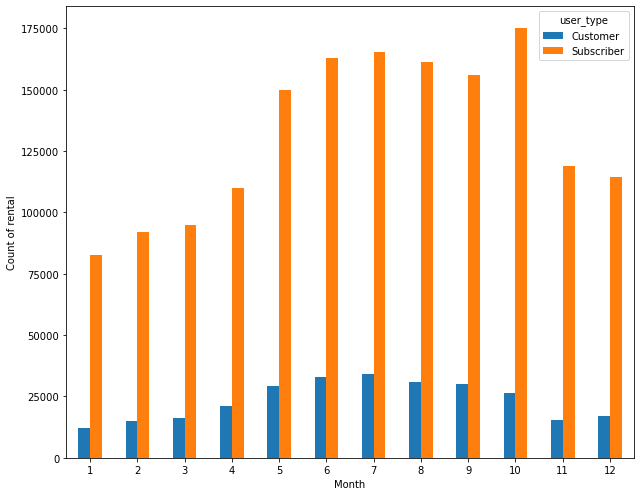

In [5]:
# Plot Month Chart
dfg_month = grouped_month["start_time"].count()
ax = dfg_month.unstack(level=1).plot(kind='bar', subplots=False, rot=0, figsize=(9, 7))

plt.xlabel("Month")
plt.ylabel("Count of rental")

plt.tight_layout()


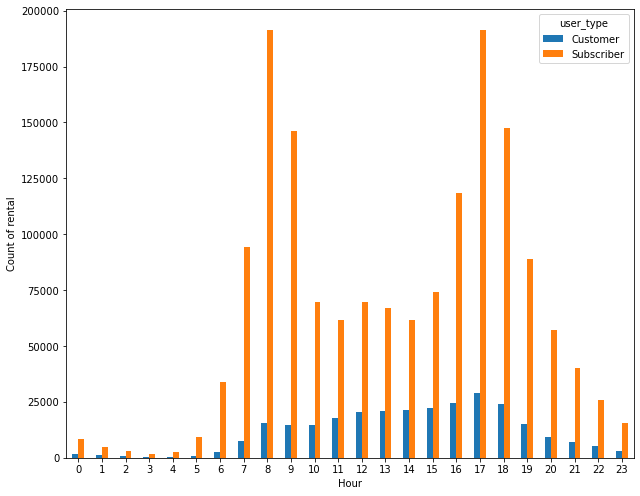

In [6]:
# Plot Day Chart
dfg_day = grouped_day["start_time"].count()
ax = dfg_day.unstack(level=1).plot(kind='bar', subplots=False, rot=0, figsize=(9, 7))

plt.xlabel("Hour")
plt.ylabel("Count of rental")

plt.tight_layout()


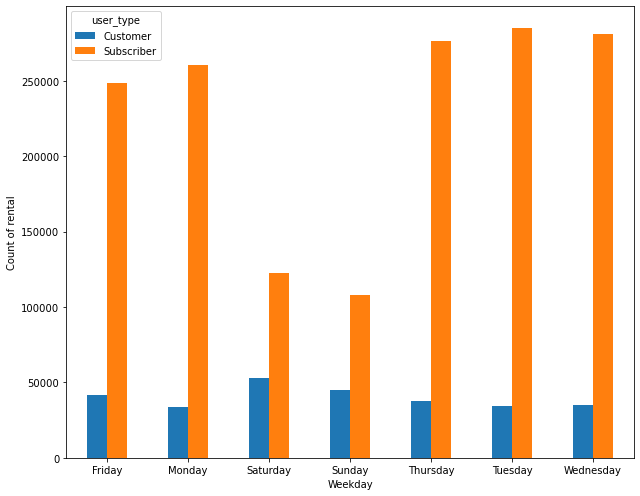

In [7]:
# Plot Month Chart
dfg_weekday = grouped_weekday["start_time"].count()
ax = dfg_weekday.unstack(level=1).plot(kind='bar', subplots=False, rot=0, figsize=(9, 7))

plt.xlabel("Weekday")
plt.ylabel("Count of rental")

plt.tight_layout()


In [8]:
df_weather = pd.read_csv("data/weather_hourly_sf.csv")
df_weather


,date_time,max_temp,min_temp,precip
0,2017-01-02 01:00:00,10.6,10.6,0.0
1,2017-01-02 02:00:00,10.0,10.0,0.0
2,2017-01-02 03:00:00,10.0,10.0,0.0
3,2017-01-02 04:00:00,10.0,10.0,0.0
4,2017-01-02 05:00:00,9.4,9.4,0.0
...,...,...,...,...
26299,2020-01-01 20:00:00,13.3,13.3,0.0
26300,2020-01-01 21:00:00,13.3,13.3,0.0
26301,2020-01-01 21:00:00,14.4,14.4,0.0
26302,2020-01-01 23:00:00,13.9,13.9,0.0


In [9]:
# Building average temparature between max_temp and min_temp
df_weather['avg_temp'] = df_weather[['max_temp', 'min_temp']].mean(axis=1)
df_weather['date_time'] = pd.to_datetime(df_weather['date_time']).dt.date

# Drop every date which is not in 2018 dates of bike rental data
all_dates = pd.to_datetime(df_bikes["start_time"]).dt.date
df_weather = df_weather[df_weather['date_time'].isin(all_dates)]

df_weather

,date_time,max_temp,min_temp,precip,avg_temp
8736,2018-01-01,13.3,13.3,0.0,13.3
8737,2018-01-01,12.2,12.2,0.0,12.2
8738,2018-01-01,11.1,11.1,0.0,11.1
8739,2018-01-01,11.1,11.1,0.0,11.1
8740,2018-01-01,9.4,9.4,0.0,9.4
...,...,...,...,...,...
17514,2018-12-31,13.3,13.3,0.0,13.3
17515,2018-12-31,13.9,13.9,0.0,13.9
17516,2018-12-31,14.4,14.4,0.0,14.4
17517,2018-12-31,14.4,14.4,0.0,14.4


In [10]:
df_weather = df_weather.groupby('date_time', as_index=False, sort=True)['avg_temp', 'precip'].mean()
df_weather

C:\Users\patri\AppData\Local\Temp\ipykernel_14056\3625270044.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_weather = df_weather.groupby('date_time', as_index=False, sort=True)['avg_temp', 'precip'].mean()


,date_time,avg_temp,precip
0,2018-01-01,9.575000,0.000000
1,2018-01-02,10.050000,0.000000
2,2018-01-03,11.112500,0.166667
3,2018-01-04,12.629167,0.125000
4,2018-01-05,14.604167,0.291667
...,...,...,...
360,2018-12-27,10.808333,0.000000
361,2018-12-28,11.875000,0.000000
362,2018-12-29,8.337500,0.000000
363,2018-12-30,9.166667,0.000000


In [11]:
df = df_bikes.copy(deep=True)
df['start_time'] = pd.to_datetime(df['start_time'])
df["start_time"] = df["start_time"].dt.date
df = df.rename(columns={'start_time': 'date_time'})

In [21]:
df_merged = pd.merge(df, df_weather,how='outer', on='date_time')
df_merged

,date_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,avg_temp,precip
0,2018-01-31,2018-02-01 19:47:20,120.0,285.0,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,11.437500,0.00
1,2018-01-31,2018-02-01 15:57:18,15.0,15.0,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,11.437500,0.00
2,2018-01-31,2018-02-01 10:16:53,304.0,296.0,Jackson St at 5th St,5th St at Virginia St,3039,Customer,11.437500,0.00
3,2018-01-31,2018-02-01 07:51:21,75.0,47.0,Market St at Franklin St,4th St at Harrison St,321,Customer,11.437500,0.00
4,2018-01-31,2018-02-01 06:58:32,74.0,19.0,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber,11.437500,0.00
...,...,...,...,...,...,...,...,...,...,...
1863716,2018-12-01,2018-12-01 00:19:49,345.0,81.0,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber,12.202083,0.25
1863717,2018-12-01,2018-12-01 00:16:50,10.0,58.0,Washington St at Kearny St,Market St at 10th St,2034,Subscriber,12.202083,0.25
1863718,2018-12-01,2018-12-01 00:09:48,245.0,255.0,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber,12.202083,0.25
1863719,2018-12-01,2018-12-01 00:08:00,93.0,126.0,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber,12.202083,0.25


In [29]:
df_average_rental_per_day = df_merged.groupby(by=['date_time', "user_type", "avg_temp","precip"], as_index=True, sort=True)["user_type"].count()
df_average_rental_per_day

date_time   user_type   avg_temp   precip  
2018-01-01  Customer    9.575000   0.000000     580
            Subscriber  9.575000   0.000000     795
2018-01-02  Customer    10.050000  0.000000     377
            Subscriber  10.050000  0.000000    2875
2018-01-03  Customer    11.112500  0.166667     235
                                               ... 
2018-12-29  Subscriber  8.337500   0.000000    2091
2018-12-30  Customer    9.166667   0.000000     848
            Subscriber  9.166667   0.000000    1805
2018-12-31  Customer    10.633333  0.000000     710
            Subscriber  10.633333  0.000000    2334
Name: user_type, Length: 730, dtype: int64

In [39]:
df_unstacked = df_average_rental_per_day.unstack(level=1).reset_index()  
avg_temp = list(df_unstacked["avg_temp"])
avg_precip = list(df_unstacked["precip"])
customers = list(df_unstacked["Customer"])
subscribers = list(df_unstacked["Subscriber"])

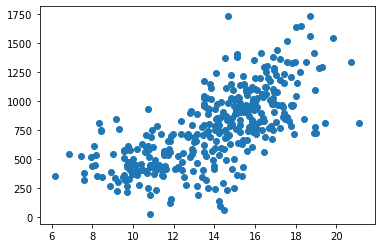

In [42]:
plt.scatter(avg_temp, customers)
plt.show()

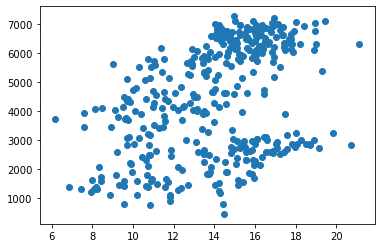

In [43]:
plt.scatter(avg_temp, subscribers)
plt.show()

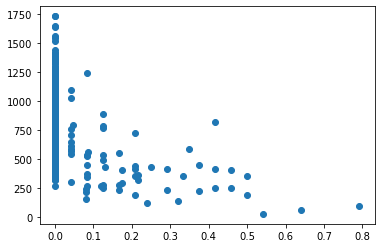

In [44]:
plt.scatter(avg_precip, customers)
plt.show()

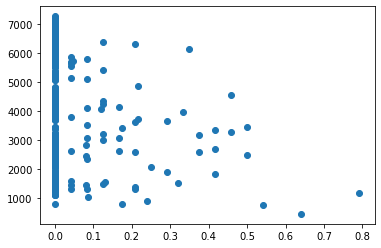

In [45]:
plt.scatter(avg_precip, subscribers)
plt.show()